# Оценка риска ДТП

Вы — специалист по Data Sciense в каршеринговой компании. Вам поступил заказ: нужно создать систему, которая могла бы оценить риск ДТП по выбранному маршруту движения. Под риском понимается вероятность ДТП с любым повреждением транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.

Идея создания такой системы находится в стадии предварительного обсуждения и проработки. Чёткого алгоритма работы и подобных решений на рынке ещё не существует. Текущая задача — понять, возможно ли предсказывать ДТП, опираясь на исторические данные одного из регионов.

Идея решения задачи от заказчика: 

1. Создать модель предсказания ДТП (целевое значение — at_fault (виновник) в таблице parties)
    - Для модели выбрать тип виновника — только машина (car).
    - Выбрать случаи, когда ДТП привело к любым повреждениям транспортного средства, кроме типа SCRATCH (царапина).
    - Для моделирования ограничиться данными за 2012 год — они самые свежие.
    - Обязательное условие — учесть фактор возраста автомобиля.
2. На основе модели исследовать основные факторы ДТП.
3. Понять, помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:
    - Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?
    - Какие ещё факторы нужно учесть?
    - Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?
Заказчик предлагает вам поработать с базой данных по происшествиям и сформировать свои идеи создания такой системы. 

<b>Краткое описание таблиц</b>
- collisions — общая информация о ДТП

Имеет уникальный case_id. Эта таблица описывает общую информацию о ДТП. Например, где оно произошло и когда.
- parties — информация об участниках ДТП

Имеет неуникальный case_id, который сопоставляется с соответствующим ДТП в таблице collisions. Каждая строка здесь описывает одну из сторон, участвующих в ДТП. Если столкнулись две машины, в этой таблице должно быть две строки с совпадением case_id. Если нужен уникальный идентификатор, это case_id and party_number.
- vehicles — информация о пострадавших машинах

Имеет неуникальные case_id и неуникальные party_number, которые сопоставляются с таблицей collisions и таблицей parties. Если нужен уникальный идентификатор, это case_id and party_number.

## Описание хода работы

Шаг 1. Загрузить таблицы sql

Подключиться к базе данных, используя данные для входа
 
Шаг 2. Провести первичное исследование таблиц

- Все ли таблицы имеют набор данных;
- Соответствует ли количество таблиц условию задачи;
- Имеется ли общий ключ для связи таблиц.

Для осмотра таблиц использовать sql-запрос.

Шаг 3. Провести статистический анализ факторов ДТП

- Выяснить, в какие месяцы происходит наибольшее количество аварий. Проанализировать весь период наблюдений (таблица collisions).
- Создать sql-запрос;
- Постройть график;
- Сделать вывод.

- Скоро состоится первое совещание вашей рабочей группы. Чтобы обсуждение было конструктивным, каждый сотрудник должен понимать данные. Для этого вы должны создать подходящие аналитические задачи и поручить их решение коллегам. Примеры задач:
    - Проведите анализ серьёзности повреждений транспортного средства, исходя из состояния дороги в момент ДТП (связать collisions и parties);
    - Найдите самые частые причины ДТП (таблица parties).
    - Создайте не менее шести задач для коллег. Опирайтесь на примеры и таблицы. 
    - Пропишите порядок решения для двух задач из списка. Обязательное условие — решение этих задач должно включать связь не менее 2-х таблиц. Пример прописанного порядка:
        - Создайте sql-запрос;
        - Постройте график;
        - Сделайте вывод.

Шаг 4. Создать модель для оценки водительского риска

1. Подготовить набор данных на основе первичного предположения заказчика:
 
    - Выберать тип виновника — только машина (car). **
    - Взять случаи, когда ДТП привело к любым значимым повреждениям автомобиля любого из участников — все, кроме типа SCRATCH (царапина).
    - Для моделирования взять данные только за 2012 год.
    - Подготовка исходной таблицы должна проводиться с помощью sql-запроса.
2. Провести первичный отбор факторов, необходимых для модели. Изучить описание факторов. Нужно отобрать те, которые могут влиять на вероятность ДТП.

3. Провести статистическое исследование отобранных факторов.
    - По результату исследовательского анализа внести корректировки, если они нужны. Сделать вывод.
    - Если необходимо, категоризовать исходные данные, провести масштабирование.
    - Подготовить обучающую и тестовую выборки.

Шаг 5. Найти лучшую модель

- Смоделировать не менее 3-х типов моделей с перебором гиперпараметров.
- Выбрать метрику для оценки модели, исходя из поставленной бизнесом задачи. Обосновать свой выбор.
- Оформить вывод в виде сравнительной таблицы.

Шаг 6. Проверить лучшую модель в работе

1. Провести графический анализ «Матрица ошибок». Вывести полноту и точность на график.
2. Проанализировать важность основных факторов, влияющих на вероятность ДТП.
3. Для одного из выявленных важных факторов провести дополнительное исследование:
    - Показать график зависимости фактора и целевой переменной.
    - Предложить, чем можно оборудовать автомобиль, чтобы учесть этот фактор во время посадки водителя.

Шаг 7. Сделать общий вывод по модели

- Кратко описать лучшую модель.
- Сделать вывод: насколько возможно создание адекватной системы оценки риска при выдаче авто?
- Какие факторы ещё необходимо собирать, чтобы улучшить модель?

## Настройки рабочей тетради

In [1]:
# Импорт библиотек

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

import seaborn as sns

from sqlalchemy import create_engine 
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

import os

In [2]:
# Настройки библиотек

pd.options.mode.chained_assignment = None  # default='warn'
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

## Подключение к базе. Загрузка таблицы sql

In [4]:
engine = create_engine(connection_string) 

## Первичное исследование таблиц

In [5]:
query = '''
SELECT
    *
FROM collisions
'''

table = pd.read_sql_query(query, con=engine) 
display(table)

,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time
0,4083072,1942,los angeles,528.0,north,0.0,cloudy,highway,small damage,2,vehicle code violation,unsafe lane change,sideswipe,other motor vehicle,wet,normal,daylight,none,2009-01-22,07:25:00
1,4083075,4313,santa clara,0.0,None,1.0,clear,None,small damage,1,vehicle code violation,improper passing,hit object,fixed object,dry,normal,dark with street lights,functioning,2009-01-03,02:26:00
2,4083073,0109,alameda,0.0,None,1.0,clear,None,scratch,2,vehicle code violation,improper turning,broadside,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-11,03:32:00
3,4083077,0109,alameda,0.0,None,1.0,clear,None,scratch,2,vehicle code violation,automobile right of way,broadside,other motor vehicle,dry,normal,daylight,functioning,2009-01-11,10:35:00
4,4083087,4313,santa clara,0.0,None,1.0,clear,None,scratch,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,None,dark with street lights,functioning,2009-01-02,22:43:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399995,4082805,1502,kern,57.0,east,0.0,clear,None,middle damage,2,vehicle code violation,pedestrian violation,other,other object,dry,normal,dark with no street lights,none,2009-01-17,21:04:00
1399996,4082820,1953,los angeles,0.0,None,1.0,clear,None,middle damage,2,vehicle code violation,pedestrian right of way,other,other object,dry,normal,daylight,functioning,2009-01-18,14:20:00
1399997,4082829,1502,kern,0.0,None,1.0,clear,highway,middle damage,2,vehicle code violation,pedestrian right of way,other,other object,dry,normal,dark with street lights,functioning,2009-01-17,18:06:00
1399998,4083008,4313,santa clara,20.0,east,NaN,clear,None,middle damage,2,vehicle code violation,pedestrian right of way,other,other object,dry,normal,dark with street lights,functioning,2009-01-06,17:53:00


In [6]:
query = '''
SELECT
    *
FROM Parties
'''

table = pd.read_sql_query(query, con=engine) 
display(table)

,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,22,3899454,1,road signs,1,29.0,had not been drinking,None,0.0
1,23,3899454,2,road signs,0,7.0,had not been drinking,None,0.0
2,29,3899462,2,car,0,21.0,had not been drinking,None,0.0
3,31,3899465,2,road signs,0,24.0,had not been drinking,None,0.0
4,41,3899478,2,road bumper,0,NaN,not applicable,not applicable,0.0
...,...,...,...,...,...,...,...,...,...
2752403,1549682,4981212,2,building,0,22.0,had not been drinking,None,NaN
2752404,1644472,5041069,2,building,0,13.0,had not been drinking,None,0.0
2752405,1906386,5181692,1,building,1,5.0,had not been drinking,None,0.0
2752406,2403824,5453437,2,building,0,30.0,had not been drinking,None,0.0


In [7]:
query = '''
SELECT
    *
FROM Vehicles 
'''

table = pd.read_sql_query(query, con=engine) 
display(table)

,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age
0,1175713,5305032,2,sedan,manual,3.0
1,1,3858022,1,sedan,auto,3.0
2,1175712,5305030,1,sedan,auto,3.0
3,1175717,5305033,3,sedan,auto,5.0
4,1175722,5305034,2,sedan,auto,5.0
...,...,...,...,...,...,...
1021229,1175684,5304990,2,sedan,manual,6.0
1021230,1175686,5304993,2,sedan,manual,3.0
1021231,1175687,5304994,2,sedan,manual,3.0
1021232,1175693,5305002,1,sedan,manual,5.0


In [8]:
query = '''
SELECT
    *
FROM case_ids 
'''

table = pd.read_sql_query(query, con=engine) 
display(table)

,case_id,db_year
0,0081715,2021
1,0726202,2021
2,3858022,2021
3,3899441,2021
4,3899442,2021
...,...,...
1399995,5668365,2021
1399996,5668366,2021
1399997,5668367,2021
1399998,5668368,2021


### Вывод

- все таблицы имеют заявленный набор данных. Однако стоит поправить на схеме данные о таблице case_ids: в ER диаграмме указано, что в этой таблице кроме ключа есть ещё один столбец "Case_id", в реальности же этим столбцом является "db_year". Также в таблице collisions: в документации устройство управление обозначено как "control_condition_1", в предоставленной таблице и ER-диаграмме оно отмечено как "control_device"

- непонятно для чего в таблице collisions сделан отдельно столбец "intersection" с информацией "Является ли место происшествие перекрёстком", если есть столбец "тип дороги", в котором в том числе есть информация о перекрёстках.

- количество таблиц соответствуют условию задачи

- все таблицы имею общий ключ

##  Статистический анализ факторов ДТП

### Выяснить, в какие месяцы происходит наибольшее количество аварий. Проанализировать весь период наблюдений.

In [9]:
query = '''
SELECT
    EXTRACT(MONTH FROM CAST(collision_date AS timestamp)) AS month,
    COUNT(case_id)
FROM collisions 
GROUP BY EXTRACT(MONTH FROM CAST(collision_date AS timestamp))
'''

table = pd.read_sql_query(query, con=engine) 
display(table)

,month,count
0,1.0,132044
1,2.0,128858
2,3.0,139581
3,4.0,130180
4,5.0,130316
5,6.0,102594
6,7.0,102227
7,8.0,104089
8,9.0,105159
9,10.0,112237


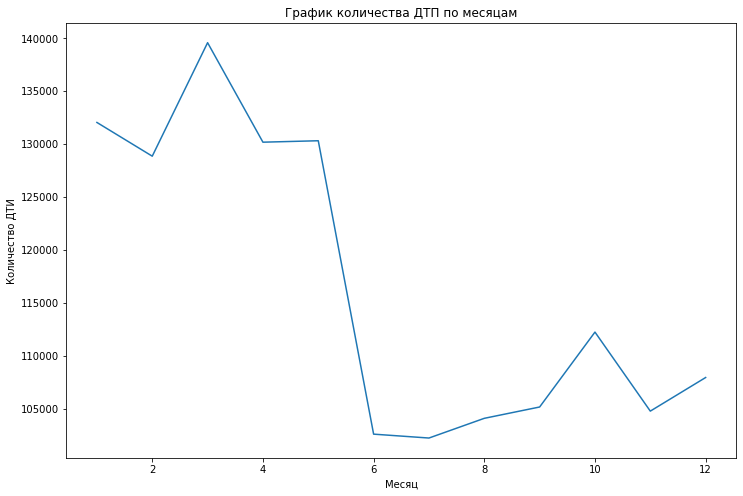

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(table['month'], table['count'])
plt.gca().set(title='График количества ДТП по месяцам', ylabel='Количество ДТИ', xlabel='Месяц')
plt.show()

#### Вывод

Самое "опасное" время года по количествам ДТП - весна: в весенние месяцы намного больше ДТП нежели в другое время года. Наибольшее количество ДТП случается в марте. Самым "безопасным" временем года является лето, а наименьшее количество ДТП случается в июле.

In [11]:
query = '''
SELECT
    COUNT(DISTINCT(EXTRACT(MONTH FROM CAST(collision_date AS timestamp)))),
    EXTRACT(YEAR FROM CAST(collision_date AS timestamp))
FROM collisions 
GROUP BY EXTRACT(YEAR FROM CAST(collision_date AS timestamp))
'''

table = pd.read_sql_query(query, con=engine) 
display(table)

,count,date_part
0,12,2009.0
1,12,2010.0
2,12,2011.0
3,12,2012.0
4,6,2013.0
5,2,2020.0


Присутствуют данные за неполные года, посмотрим как сильно они меняют картину ситуации

In [12]:
query = '''
SELECT
    EXTRACT(MONTH FROM CAST(collision_date AS timestamp)) AS month,
    COUNT(case_id)
FROM collisions 
WHERE EXTRACT(YEAR FROM CAST(collision_date AS timestamp)) > 2012
GROUP BY EXTRACT(MONTH FROM CAST(collision_date AS timestamp))
'''

table = pd.read_sql_query(query, con=engine) 
display(table)

,month,count
0,1.0,144
1,2.0,108
2,3.0,47
3,4.0,5
4,6.0,1
5,7.0,2


,month,count
0,1.0,131900
1,2.0,128750
2,3.0,139534
3,4.0,130175
4,5.0,130316
5,6.0,102593
6,7.0,102225
7,8.0,104089
8,9.0,105159
9,10.0,112237


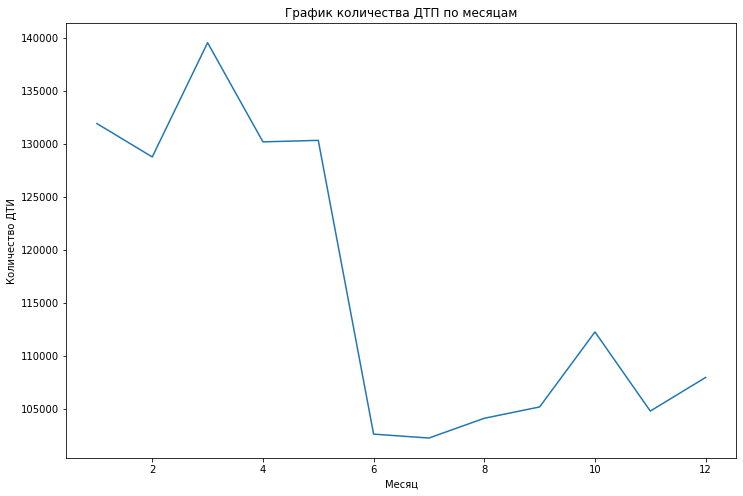

In [13]:
query = '''
SELECT
    EXTRACT(MONTH FROM CAST(collision_date AS timestamp)) AS month,
    COUNT(case_id)
FROM collisions 
WHERE EXTRACT(YEAR FROM CAST(collision_date AS timestamp)) < 2013
GROUP BY EXTRACT(MONTH FROM CAST(collision_date AS timestamp))
'''

table = pd.read_sql_query(query, con=engine) 
display(table)


plt.figure(figsize=(12, 8))
plt.plot(table['month'], table['count'])
plt.gca().set(title='График количества ДТП по месяцам', ylabel='Количество ДТИ', xlabel='Месяц')
plt.show()

<b>Вывод</b>

Данные за неполные года присутствуют, однако их количество много меньше данных за другие годы, поэтому они никак не меняют график и общий вывод задачи.

### Скоро состоится первое совещание рабочей группы. Чтобы обсуждение было конструктивным, каждый сотрудник должен понимать данные. Для этого нужно создать подходящие аналитические задачи и поручить их решение коллегам.

#### Создать не менее шести задач для коллег, опираясь на примеры и таблицы.

1. Какой тип транспортных средств чаще всего попадает в серьёзные ДТП (не считая царапин) ?
2. Какие типы ДТП наиболее распространены среди автомобилей старше 10 лет
3. В каких географических районах чаще всего происходят ДТП с участием человека в нетрезвом виде?
4. Верно ли, что на перекрестках больше аварий случается у водителей с ручным КПП?
5. В какие часы происходит больше всего ДТП по вине нетрезвого участника?
6. Сколько ДТП произошло на перекрёстке по вине участника, у которого было выявлено наличие телефона в машине?

#### Порядок решения для двух задач из списка. Обязательное условие — решение этих задач должно включать связь не менее 2-х таблиц.

<b>Порядок решения для задачи 1:</b>

1. Создать sql-запрос для выгрузки статистики о зависимости между типом ТС и количеством ДТП, используя таблицы vehicles и collisions
2. Построить график и определить типы ТС с наибольшим количеством ДТП
3. Сделать вывод


<b>Порядок решения для задачи 4:</b>


1. Создать sql-запрос для выгрузки статистики о зависимости между типом КПП и количеством аварий на перекрёстках, используя таблицы vehicles и collisions.
2. Сделать вывод.

## Создать модель для оценки водительского риска

### Подготовка набора данных на основе первичного предположения заказчика

<b>Идея решения задачи от заказчика</b>:

1. Создать модель предсказания ДТП (целевое значение — at_fault (виновник) в таблице parties)
  - Для модели выбрать тип виновника — только машина (car).
  - Выбрать случаи, когда ДТП привело к любым повреждениям транспортного средства, кроме типа SCRATCH (царапина).
  - Для моделирования ограничиться данными за 2012 год — они самые свежие.
  - Обязательное условие — учесть фактор возраста автомобиля.
  
2. На основе модели исследовать основные факторы ДТП.

3. Понять, помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:
  - Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?
  - Какие ещё факторы нужно учесть?
  - Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?

In [14]:
query = '''
SELECT
    *
FROM collisions AS cols
JOIN case_ids AS ci ON ci.case_id=cols.case_id
JOIN vehicles AS v ON v.case_id=ci.case_id
JOIN parties AS p ON p.case_id=ci.case_id
WHERE cols.case_id in (SELECT
                            DISTINCT(case_id)
                        FROM parties
                        WHERE party_type = 'car' 
                        AND at_fault = 1)
AND EXTRACT(YEAR FROM CAST(cols.collision_date AS timestamp)) = 2012
AND cols.collision_damage != 'scratch'
'''

data = pd.read_sql_query(query, con=engine) 
display(data)

,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time,case_id,db_year,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,5607652,3616,san bernardino,650.0,east,0.0,raining,None,small damage,2,vehicle code violation,None,rear end,parked motor vehicle,wet,normal,dark with street lights,none,2012-04-25,20:11:00,5607652,2021,1470493,5607652,1,sedan,auto,7.0,2670815,5607652,2,road bumper,0,NaN,None,None,NaN
1,5403134,3711,san diego,0.0,None,1.0,None,None,fatal,2,vehicle code violation,speeding,other,other object,dry,normal,daylight,none,2012-01-17,07:46:00,5403134,2021,1274977,5403134,2,hatchback,manual,14.0,2312706,5403134,2,road signs,0,92.0,had not been drinking,None,0.0
2,5403135,3404,sacramento,10.0,east,0.0,cloudy,None,fatal,2,vehicle code violation,improper passing,None,other object,wet,normal,dusk or dawn,none,2012-01-19,17:10:00,5403135,2021,1274981,5403135,2,hatchback,auto,2.0,2312708,5403135,2,road signs,0,16.0,had not been drinking,None,NaN
3,5403135,3404,sacramento,10.0,east,0.0,cloudy,None,fatal,2,vehicle code violation,improper passing,None,other object,wet,normal,dusk or dawn,none,2012-01-19,17:10:00,5403135,2021,1274978,5403135,1,sedan,manual,2.0,2312708,5403135,2,road signs,0,16.0,had not been drinking,None,NaN
4,5457730,1942,los angeles,395.0,south,0.0,clear,None,middle damage,3,vehicle code violation,speeding,rear end,parked motor vehicle,dry,normal,daylight,none,2012-01-25,16:40:00,5457730,2021,1329394,5457730,1,coupe,auto,3.0,2411914,5457730,3,road bumper,0,NaN,not applicable,not applicable,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116964,5455478,1500,kern,18.0,south,0.0,clear,None,small damage,2,vehicle code violation,unsafe lane change,sideswipe,other motor vehicle,dry,normal,daylight,functioning,2012-01-04,16:00:00,5455478,2021,1327108,5455478,2,sedan,auto,11.0,2407561,5455478,2,car,0,20.0,had not been drinking,None,0.0
116965,5455525,4204,santa barbara,3168.0,north,0.0,clear,highway,small damage,1,vehicle code violation,speeding,hit object,other object,dry,obstruction,daylight,functioning,2012-01-02,08:55:00,5455525,2021,1327155,5455525,1,sedan,auto,14.0,2407636,5455525,1,car,1,77.0,had not been drinking,None,0.0
116966,5455540,0300,amador,10.0,north,0.0,clear,None,small damage,1,vehicle code violation,wrong side of road,hit object,fixed object,dry,loose material,dark with no street lights,functioning,2012-01-02,20:59:00,5455540,2021,1327182,5455540,1,sedan,manual,2.0,2407663,5455540,1,car,1,18.0,had not been drinking,None,0.0
116967,5455736,1949,los angeles,1000.0,north,0.0,clear,highway,small damage,2,vehicle code violation,improper turning,hit object,other object,dry,normal,daylight,none,2012-01-04,11:55:00,5455736,2021,1327369,5455736,2,sedan,manual,1.0,2408036,5455736,1,car,1,25.0,had not been drinking,None,0.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116969 entries, 0 to 116968
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   case_id                      116969 non-null  object 
 1   county_city_location         116969 non-null  object 
 2   county_location              116969 non-null  object 
 3   distance                     116969 non-null  float64
 4   direction                    88806 non-null   object 
 5   intersection                 116590 non-null  float64
 6   weather_1                    116602 non-null  object 
 7   location_type                53200 non-null   object 
 8   collision_damage             116969 non-null  object 
 9   party_count                  116969 non-null  int64  
 10  primary_collision_factor     116969 non-null  object 
 11  pcf_violation_category       115598 non-null  object 
 12  type_of_collision            116393 non-null  object 
 13 

#### Первичный отбор факторов, необходимых для модели

Полученная таблица довольно большая, и понятно, что для модели не нужны все признаки, поэтому сначала отберём все признаки, которые теоретически могут повлиять на вероятность ДТП.

Для начала убираем все столбцы, которые были необходимы для связи между таблицами в базе данных

In [16]:
for_drop_1 = ['case_id', 'id', 'party_number']

data = data.drop(for_drop_1, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116969 entries, 0 to 116968
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   county_city_location         116969 non-null  object 
 1   county_location              116969 non-null  object 
 2   distance                     116969 non-null  float64
 3   direction                    88806 non-null   object 
 4   intersection                 116590 non-null  float64
 5   weather_1                    116602 non-null  object 
 6   location_type                53200 non-null   object 
 7   collision_damage             116969 non-null  object 
 8   party_count                  116969 non-null  int64  
 9   primary_collision_factor     116969 non-null  object 
 10  pcf_violation_category       115598 non-null  object 
 11  type_of_collision            116393 non-null  object 
 12  motor_vehicle_involved_with  116656 non-null  object 
 13 

Посмотрим на оставшиеся столбцы:

1. 'county_city_location' и 'county_location' - являются одними и теми же данными в разном представлении. Этот признак является категориальным, поэтому мы точно можем убрать один из столбцов. Теперь подумаем, может ли географический район повлиять на ДТП? - да, может, т.к., судя по содержанию столбцов, речь идёт о США, в которых, как известно, каждый штат имеет собственный кодекс дорожного движения, что может повлиять на ДТП, однако влияние такого фактора мало, но из-за того, что этот признак является категориальным, то при оставлении мы получим много дополнительных столбцов после категоризации, что ухудшит предсказание модели. <b>(ИТОГ: убрать столбцы 'county_location' и 'county_city_location')</b>


2. столбец 'distance' обозначает расстояние от главной дороги. Теоретически, этот признак может влиять на вероятность ДТП, т.к. можно предположить, что чем дальше от главной дороги, тем хуже дорожные условия, например хуже видимость, отсутствие некоторых дорожных знаков, хуже дорожное полотно. На первичном отборе оставим этот признак. <b>(ИТОГ: оставить 'distance')</b>


3. 'direction' - направление движение, а конкретно север/юг/запад/восток. Вряд ли можно логически представить какую-либо зависимость вероятности ДТП от направления движения, убираем признак. <b>(ИТОГ: убрать 'direction')</b>


4. 'intersection' - является ли место происшествие перекрёстком да/нет. Как было замечено в предыдущем пункте, столбец 'intersection' является частным случаем столбца 'location_type', т.к. в первом указано произошло происшествие на перекрестке или нет, а во втором - тип дороги как характеристика ДТП и среди этих типов уже есть перекресток. Проверим записаны ли все данные из столбца 'intersection' в столбец 'location_type'. <b>(ИТОГ: Проверить на соответствие столбца 'intersection' столбцу 'location_type')</b>


5. 'weather_1' - погода. В некоторых случаях погода может влиять на вероятность ДТП, потому что сама по себе изменяет дорожные условия, например видимость или сцепление с дорожным покрытием(что может отрицательно сказаться на тормозном пути и стать причиной аварии) <b>(ИТОГ: оставить 'weather_1')</b>


6. 'location_type' - тип дороги. Является обобщением столбца 'intersection' (см. п.4). Тип дороги также имеет отношением к вероятности ДТП, т.к. является одним из определяющих дорожные условия. <b>(ИТОГ: Проверить на соответствие столбца 'intersection' столбцу 'location_type')</b>


7. 'collision_damage', 'party_count', 'primary_collision_factor', 'pcf_violation_category', 'type_of_collision', 'motor_vehicle_involved_with' - факторы, которые являются следствием возникновения ДТП, т.е. появляются только после самого ДТП, а значит не могут использованы для модели, прогнозирующей вероятность ДТП. <b>(ИТОГ: Убрать 'collision_damage', 'party_count', 'primary_collision_factor', 'pcf_violation_category', 'type_of_collision', 'motor_vehicle_involved_with')</b>


8. 'road_surface' - cостояние дороги(мокрая/сухая/заледенелая/..). Само по себе состояние дороги является важным фактором для вероятности ДТП, однако стоит заметить, что оно практически полностью зависит от погоды, если бы в данных было больше информации о погоде (температура, скорость ветра и т.д.), то тогда данный стобец был бы лишним для модели, но их нет, поэтому оставляем признак. <b>(ИТОГ: оставить 'road_surface')</b>


9. 'road_condition_1' - дорожное состояние (ямы, сыпучий материал и т.п.). Является таким же важным признаком как и 'road_surface', поэтому оставляем. <b>(ИТОГ: оставить 'road_condition_1')</b>


10. 'lighting' - освещение. Является важным признаком, т.к. определяет дорожные условия и соответственно влияет на ДТП. <b>(ИТОГ: оставить 'lighting')</b>


11. 'control_device' - устройство управления. Логично предположить, что исправность устройства управления в некоторых случаях во многом определяет вероятность ДТП. <b>(ИТОГ: оставить 'control_device')</b>


12. 'collision_date' - дата происшествия. Как мы узнали из пунктов выше, в разные месяцы - разное количество ДТП, а значит как минимум месяц коррелирует с вероятностью. Отметим, что год не имеет влияния (как минимум потому, что мы рассматриваем данные только за 2012), день также вряд ли оказывает влияние на вероятность, поэтому сам признак мы оставляем, но выделяем только месяц. <b>(ИТОГ: выделить месяц из 'collision_date')</b>


13. 'collision_time' - время происшествия. Время суток также оказывает влияние на дорожные условия(видимость), а значит и на вероятность ДТП, оставляем признак. <b>(ИТОГ: оставить 'collision_time')</b>


14. 'db_year' - какой-то год, связанной с базой данных, все значения равны 2021, т.е. это неинформативный признак, можно убрать. <b>(ИТОГ: убрать 'db_year')</b>


15. 'vehicle_type' - тип кузова. Можно сказать, что определенный тип кузова несёт в себе определенные признаки в устройстве автомобиля, например минивэн вряд ли будет пытаться сильно превысить скорость, тогда как у купе эта вероятность выше. Однако это скорее преубеждения и на большой выборке вероятность ДТП будет совсем минимально или не будет зависеть вообще от типа кузова. <b>(ИТОГ: убрать 'vehicle_type')</b>


16. 'vehicle_transmission' - Тип КПП. Аналогичные рассуждения как и с 'vehicle_type'. Если зависимость между вероятностью ДТП и типом КПП есть, то она крайне мала. Модель лишь будет "отвлекаться" на эти данные. <b>(ИТОГ: убрать 'vehicle_transmission')</b>


17. 'vehicle_age' - возраст автомобиля. По условию задачи: "Обязательное условие — учесть фактор возраста автомобиля.". Оставляем. <b>(ИТОГ: оставить 'vehicle_age')</b>


18. 'party_type' - тип участника ДТП. При выгрузке было задано, что party_type = 'car'. Неинформативный признак, убираем. <b>(ИТОГ: убрать 'party_type')</b>


19. 'at_fault' - целевой признак. <b>(ИТОГ: оставить 'at_fault')</b>


20. 'insurance_premium' - cумма страховки. Объективно, сумма страховки не может иметь хоть какое-то отношение к вероятности ДТП. <b>(ИТОГ: убрать 'insurance_premium')</b>


21. 'party_sobriety' - трезвость участника. Очевидно, что этот признак является важным для целевого признака. <b>(ИТОГ: оставить 'party_sobriety')</b>


22. 'party_drug_physical' - cостояние участника: физическое или с учётом принятых лекарств. Аналогично 'party_sobriety'. <b>(ИТОГ: оставить 'party_drug_physical')</b>


23. 'cellphone_in_use' - наличие телефона в автомобиле (возможности разговаривать по громкой связи). Здесь стоит вспомнить, что согласно ПДД запрещено разговаривать по телефону, находясь за рулём, не только потому, что занята одна рука (громкая связь убирает это недостаток), но и потому, что падает внимательность водителя, что может привести к ДТП. Оставляем признак. <b>(ИТОГ: оставить 'cellphone_in_use')</b>

In [17]:
# Пункты 4. и 6.
# Проверка на соответствие intersection столбцу location_type

print(data.loc[data['intersection'] == 0]['location_type'].value_counts())
print(data.loc[data['intersection'] == 1]['location_type'].value_counts())

highway         43962
ramp             5007
intersection      556
Name: location_type, dtype: int64
intersection    2186
ramp             954
highway          473
Name: location_type, dtype: int64


Похоже, что столбец 'intersection' не относится к столбцу 'location_type', поэтому оставляем оба столбца.

In [18]:
# Пункты 12. и 13.

data['collision_date'] = pd.to_datetime(data['collision_date'], format='%Y-%m-%d')
data['collision_time'] = pd.to_datetime(data['collision_time'], format='%H:%M:%S')

for i in data.index:
    data.loc[i, 'collision_date'] = data.loc[i, 'collision_date'].month
    data.loc[i, 'collision_time'] = data.loc[i, 'collision_time'].hour
data

,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time,db_year,vehicle_type,vehicle_transmission,vehicle_age,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,3616,san bernardino,650.0,east,0.0,raining,None,small damage,2,vehicle code violation,None,rear end,parked motor vehicle,wet,normal,dark with street lights,none,4,20,2021,sedan,auto,7.0,road bumper,0,NaN,None,None,NaN
1,3711,san diego,0.0,None,1.0,None,None,fatal,2,vehicle code violation,speeding,other,other object,dry,normal,daylight,none,1,7,2021,hatchback,manual,14.0,road signs,0,92.0,had not been drinking,None,0.0
2,3404,sacramento,10.0,east,0.0,cloudy,None,fatal,2,vehicle code violation,improper passing,None,other object,wet,normal,dusk or dawn,none,1,17,2021,hatchback,auto,2.0,road signs,0,16.0,had not been drinking,None,NaN
3,3404,sacramento,10.0,east,0.0,cloudy,None,fatal,2,vehicle code violation,improper passing,None,other object,wet,normal,dusk or dawn,none,1,17,2021,sedan,manual,2.0,road signs,0,16.0,had not been drinking,None,NaN
4,1942,los angeles,395.0,south,0.0,clear,None,middle damage,3,vehicle code violation,speeding,rear end,parked motor vehicle,dry,normal,daylight,none,1,16,2021,coupe,auto,3.0,road bumper,0,NaN,not applicable,not applicable,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116964,1500,kern,18.0,south,0.0,clear,None,small damage,2,vehicle code violation,unsafe lane change,sideswipe,other motor vehicle,dry,normal,daylight,functioning,1,16,2021,sedan,auto,11.0,car,0,20.0,had not been drinking,None,0.0
116965,4204,santa barbara,3168.0,north,0.0,clear,highway,small damage,1,vehicle code violation,speeding,hit object,other object,dry,obstruction,daylight,functioning,1,8,2021,sedan,auto,14.0,car,1,77.0,had not been drinking,None,0.0
116966,0300,amador,10.0,north,0.0,clear,None,small damage,1,vehicle code violation,wrong side of road,hit object,fixed object,dry,loose material,dark with no street lights,functioning,1,20,2021,sedan,manual,2.0,car,1,18.0,had not been drinking,None,0.0
116967,1949,los angeles,1000.0,north,0.0,clear,highway,small damage,2,vehicle code violation,improper turning,hit object,other object,dry,normal,daylight,none,1,11,2021,sedan,manual,1.0,car,1,25.0,had not been drinking,None,0.0


In [19]:
for_drop_2 = ['county_location', 'direction', 'collision_damage', 'party_count', 'primary_collision_factor', 
              'pcf_violation_category', 'type_of_collision', 'motor_vehicle_involved_with', 'db_year', 'vehicle_type', 
              'vehicle_transmission', 'party_type', 'insurance_premium', 'county_city_location']

data = data.drop(for_drop_2, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116969 entries, 0 to 116968
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   distance             116969 non-null  float64
 1   intersection         116590 non-null  float64
 2   weather_1            116602 non-null  object 
 3   location_type        53200 non-null   object 
 4   road_surface         116200 non-null  object 
 5   road_condition_1     116412 non-null  object 
 6   lighting             116648 non-null  object 
 7   control_device       116549 non-null  object 
 8   collision_date       116969 non-null  object 
 9   collision_time       116840 non-null  object 
 10  vehicle_age          113642 non-null  float64
 11  at_fault             116969 non-null  int64  
 12  party_sobriety       114654 non-null  object 
 13  party_drug_physical  11549 non-null   object 
 14  cellphone_in_use     104127 non-null  float64
dtypes: float64(4), in

#### Статистическое исследование отобранных факторов.

Рассмотрим подробнее каждый признак

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116969 entries, 0 to 116968
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   distance             116969 non-null  float64
 1   intersection         116590 non-null  float64
 2   weather_1            116602 non-null  object 
 3   location_type        53200 non-null   object 
 4   road_surface         116200 non-null  object 
 5   road_condition_1     116412 non-null  object 
 6   lighting             116648 non-null  object 
 7   control_device       116549 non-null  object 
 8   collision_date       116969 non-null  object 
 9   collision_time       116840 non-null  object 
 10  vehicle_age          113642 non-null  float64
 11  at_fault             116969 non-null  int64  
 12  party_sobriety       114654 non-null  object 
 13  party_drug_physical  11549 non-null   object 
 14  cellphone_in_use     104127 non-null  float64
dtypes: float64(4), in

In [21]:
def col_desc(column):
    '''Функция для получения статистического описания признака'''
    print('Описание признака:')
    display(data[column].describe())
    print('-----------------------------------------------------------')
    print('Уникальные значения:')
    display(data[column].value_counts())
    print('-----------------------------------------------------------')
    print('Количество пропусков:', data[column].isna().sum())
    print('-----------------------------------------------------------')

##### Признак 'distance'

In [22]:
col_desc('distance')

Описание признака:


count    1.169690e+05
mean     7.158912e+02
std      6.926367e+03
min      0.000000e+00
25%      4.000000e+00
50%      1.150000e+02
75%      5.280000e+02
max      1.584000e+06
Name: distance, dtype: float64

-----------------------------------------------------------
Уникальные значения:


0.0        28590
100.0       3808
200.0       3360
300.0       2926
500.0       2781
           ...  
13464.0        1
15998.0        1
7260.0         1
5148.0         1
1638.0         1
Name: distance, Length: 1847, dtype: int64

-----------------------------------------------------------
Количество пропусков: 0
-----------------------------------------------------------


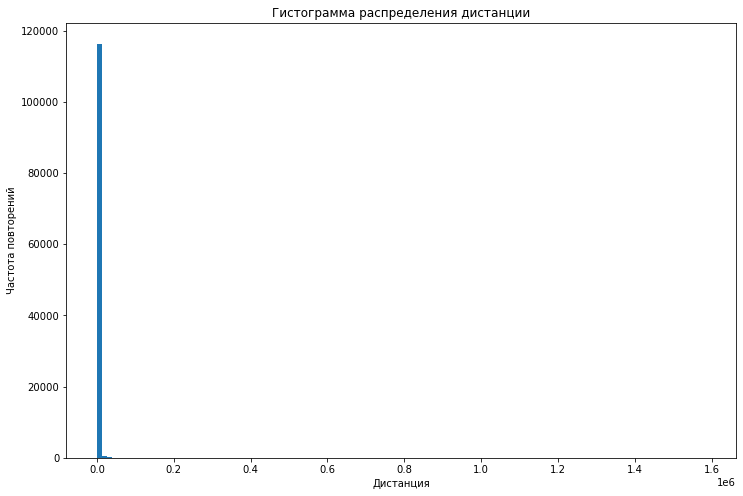

In [23]:
plt.figure(figsize=(12, 8))
plt.hist(data['distance'], bins=120)
plt.gca().set(title='Гистограмма распределения дистанции', ylabel='Частота повторений', xlabel='Дистанция')
plt.show()

<b>Вывод</b>

Сам по себе признак имеет малое, лишь предположительное, влияние на целевой признак, однако при этом имеет сильно скошенное влево распределение, что заметно ухудшит предсказания модели. Признак лучше убрать.

In [24]:
data = data.drop('distance', axis=1)

##### Признак 'intersection'

In [25]:
col_desc('intersection')

Описание признака:


count    116590.000000
mean          0.230637
std           0.421243
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: intersection, dtype: float64

-----------------------------------------------------------
Уникальные значения:


0.0    89700
1.0    26890
Name: intersection, dtype: int64

-----------------------------------------------------------
Количество пропусков: 379
-----------------------------------------------------------


<b>Вывод</b> 

Признак имеет вполне приемлимый формат. Имеется малое количество пропусков, которые можно просто удалить.

In [26]:
data = data.drop(data.loc[data['intersection'].isna()].index, axis=0)

##### Признак 'weather_1'

In [27]:
col_desc('weather_1')

Описание признака:


count     116226
unique         7
top        clear
freq       94432
Name: weather_1, dtype: object

-----------------------------------------------------------
Уникальные значения:


clear      94432
cloudy     16813
raining     4225
fog          409
snowing      264
other         62
wind          21
Name: weather_1, dtype: int64

-----------------------------------------------------------
Количество пропусков: 364
-----------------------------------------------------------


<b>Вывод</b>

Ситуация аналогична предыдущему рассматриваемому признаку. Удаляем пропуски.

In [28]:
data = data.drop(data.loc[data['weather_1'].isna()].index, axis=0)

##### Признак 'location_type'

In [29]:
col_desc('location_type')

Описание признака:


count       52992
unique          3
top       highway
freq        44301
Name: location_type, dtype: object

-----------------------------------------------------------
Уникальные значения:


highway         44301
ramp             5951
intersection     2740
Name: location_type, dtype: int64

-----------------------------------------------------------
Количество пропусков: 63234
-----------------------------------------------------------


<b>Вывод</b>

Больше половины значений в столбце пропущено, а значит больше чем на половину такой признак неинформативен для модели, т.е. он будет больше мешать модели, чем помогать. Такой признак стоит удалить

In [30]:
data = data.drop('location_type', axis=1)

##### Признак 'road_surface'

In [31]:
col_desc('road_surface')

Описание признака:


count     115606
unique         4
top          dry
freq      104876
Name: road_surface, dtype: object

-----------------------------------------------------------
Уникальные значения:


dry         104876
wet          10090
snowy          577
slippery        63
Name: road_surface, dtype: int64

-----------------------------------------------------------
Количество пропусков: 620
-----------------------------------------------------------


<b>Вывод</b>

Признак имеет вполне приемлимый формат. Имеется малое количество пропусков, которые можно просто удалить.

In [32]:
data = data.drop(data.loc[data['road_surface'].isna()].index, axis=0)

##### Признак 'road_condition_1'

In [33]:
col_desc('road_condition_1')

Описание признака:


count     115212
unique         8
top       normal
freq      111525
Name: road_condition_1, dtype: object

-----------------------------------------------------------
Уникальные значения:


normal            111525
construction        2207
obstruction          438
other                401
holes                263
loose material       191
reduced width        118
flooded               69
Name: road_condition_1, dtype: int64

-----------------------------------------------------------
Количество пропусков: 394
-----------------------------------------------------------


<b>Вывод</b>

Признак практически полностью заполнен лишь одним значением, однако так и должно быть, наличие других значений нам важно, поэтому оставляем признак. Имеется малое количество пропусков, которые можно просто удалить.

In [34]:
data = data.drop(data.loc[data['road_condition_1'].isna()].index, axis=0)

##### Признак 'lighting'

In [35]:
col_desc('lighting')

Описание признака:


count       115033
unique           5
top       daylight
freq         80418
Name: lighting, dtype: object

-----------------------------------------------------------
Уникальные значения:


daylight                                   80418
dark with street lights                    22123
dark with no street lights                  8654
dusk or dawn                                3572
dark with street lights not functioning      266
Name: lighting, dtype: int64

-----------------------------------------------------------
Количество пропусков: 179
-----------------------------------------------------------


<b>Вывод</b>

Признак имеет вполне приемлимый формат. Имеется малое количество пропусков, которые можно просто удалить.

In [36]:
data = data.drop(data.loc[data['lighting'].isna()].index, axis=0)

##### Признак 'control_device'

In [37]:
col_desc('control_device')

Описание признака:


count     114674
unique         4
top         none
freq       75371
Name: control_device, dtype: object

-----------------------------------------------------------
Уникальные значения:


none               75371
functioning        39015
not functioning      223
obscured              65
Name: control_device, dtype: int64

-----------------------------------------------------------
Количество пропусков: 359
-----------------------------------------------------------


<b>Вывод</b>

Признак имеет вполне приемлимый формат. Имеется малое количество пропусков, которые можно просто удалить.

In [38]:
data = data.drop(data.loc[data['control_device'].isna()].index, axis=0)

##### Признак 'collision_date'

In [39]:
col_desc('collision_date')

Описание признака:


count     114674
unique        12
top            3
freq       23651
Name: collision_date, dtype: int64

-----------------------------------------------------------
Уникальные значения:


3     23651
1     22315
4     21716
2     21164
5     19557
6      2688
8       777
7       716
9       669
10      479
11      478
12      464
Name: collision_date, dtype: int64

-----------------------------------------------------------
Количество пропусков: 0
-----------------------------------------------------------


<b>Вывод</b>

Признак имеет вполне приемлимый формат.

##### Признак 'collision_time'

In [40]:
col_desc('collision_time')

Описание признака:


count     114555
unique        24
top           15
freq       10419
Name: collision_time, dtype: int64

-----------------------------------------------------------
Уникальные значения:


15    10419
17     9155
16     8681
14     8626
18     7955
13     7407
12     6901
11     5824
7      5558
8      5421
19     5190
10     4698
20     4292
9      4280
21     3698
22     2872
23     2405
6      2231
2      1978
1      1877
0      1828
5      1340
3      1144
4       775
Name: collision_time, dtype: int64

-----------------------------------------------------------
Количество пропусков: 119
-----------------------------------------------------------


<b>Вывод</b>

Признак имеет вполне приемлимый формат. Имеется малое количество пропусков, которые можно просто удалить.

In [41]:
data = data.drop(data.loc[data['collision_time'].isna()].index, axis=0)

##### Признак 'vehicle_age'

In [42]:
col_desc('vehicle_age')

Описание признака:


count    111335.000000
mean          4.906885
std           3.256513
min           0.000000
25%           3.000000
50%           4.000000
75%           7.000000
max         161.000000
Name: vehicle_age, dtype: float64

-----------------------------------------------------------
Уникальные значения:


3.0      21399
4.0      14270
2.0      12255
5.0      11440
6.0       8254
7.0       8079
8.0       7354
0.0       6455
9.0       5905
1.0       5264
10.0      4166
11.0      2870
12.0      1778
13.0      1145
14.0       588
15.0        83
16.0        17
17.0         6
161.0        4
19.0         3
Name: vehicle_age, dtype: int64

-----------------------------------------------------------
Количество пропусков: 3220
-----------------------------------------------------------


<b>Вывод</b>

Признак имеет выбросы в виде значений равных 161 году, которые нужно удалить. Также в столбце присутствуют пропущенные значения, их больше нежели во всех предыдущих рассматриваемых признаках, однако их всё равно получается меньше 3% от общего количества данных, а значит их лучше будет удалить.

In [43]:
data = data.loc[data['vehicle_age'] < 10]
data = data.drop(data.loc[data['collision_time'].isna()].index, axis=0)

##### Признак 'at_fault'

In [44]:
col_desc('at_fault')

Описание признака:


count    100675.000000
mean          0.476702
std           0.499459
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: at_fault, dtype: float64

-----------------------------------------------------------
Уникальные значения:


0    52683
1    47992
Name: at_fault, dtype: int64

-----------------------------------------------------------
Количество пропусков: 0
-----------------------------------------------------------


<b>Вывод</b>

Целевой признак в порядке, не требует каких-либо изменений.

##### Признак 'party_sobriety'

In [45]:
col_desc('party_sobriety')

Описание признака:


count                     98813
unique                        6
top       had not been drinking
freq                      83422
Name: party_sobriety, dtype: object

-----------------------------------------------------------
Уникальные значения:


had not been drinking                     83422
had been drinking, under influence         5891
impairment unknown                         4842
not applicable                             3348
had been drinking, not under influence      835
had been drinking, impairment unknown       475
Name: party_sobriety, dtype: int64

-----------------------------------------------------------
Количество пропусков: 1862
-----------------------------------------------------------


<b>Вывод</b>

В столбце присутствуют пропущенные значения, их больше нежели во всех предыдущих рассматриваемых признаках, однако их всё равно получается меньше 3% от общего количества данных, а значит их лучше будет удалить.

In [46]:
data = data.drop(data.loc[data['party_sobriety'].isna()].index, axis=0)

##### Признак 'party_drug_physical'

In [47]:
col_desc('party_drug_physical')

Описание признака:


count     9181
unique       5
top          G
freq      4842
Name: party_drug_physical, dtype: object

-----------------------------------------------------------
Уникальные значения:


G                        4842
not applicable           3348
under drug influence      720
sleepy/fatigued           255
impairment - physical      16
Name: party_drug_physical, dtype: int64

-----------------------------------------------------------
Количество пропусков: 89632
-----------------------------------------------------------


<b>Вывод</b>

Столбец более чем на 90% состоит из пропусков, что делает его неинформативным для модели. Удаляем его

In [48]:
data = data.drop('party_drug_physical', axis=1)

##### Признак 'cellphone_in_use'

In [49]:
col_desc('cellphone_in_use')

Описание признака:


count    89200.000000
mean         0.021300
std          0.144385
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: cellphone_in_use, dtype: float64

-----------------------------------------------------------
Уникальные значения:


0.0    87300
1.0     1900
Name: cellphone_in_use, dtype: int64

-----------------------------------------------------------
Количество пропусков: 9613
-----------------------------------------------------------


<b>Вывод</b>

Столбец практически весь состоит из одинаковых значений и пропусков. Однако он может оказаться полезным для модели, т.к. всё несёт информацию и будет занимать только один столбец после обработки категориальных значений. Пропуски заполним медианой.

In [50]:
data['cellphone_in_use'] = data['cellphone_in_use'].fillna(data['cellphone_in_use'].median())

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98813 entries, 2 to 116968
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   intersection      98813 non-null  float64
 1   weather_1         98813 non-null  object 
 2   road_surface      98813 non-null  object 
 3   road_condition_1  98813 non-null  object 
 4   lighting          98813 non-null  object 
 5   control_device    98813 non-null  object 
 6   collision_date    98813 non-null  object 
 7   collision_time    98813 non-null  object 
 8   vehicle_age       98813 non-null  float64
 9   at_fault          98813 non-null  int64  
 10  party_sobriety    98813 non-null  object 
 11  cellphone_in_use  98813 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 9.8+ MB


In [52]:
data[['intersection', 'cellphone_in_use']] = data[['intersection', 'cellphone_in_use']].astype(object)
data['vehicle_age'] = data['vehicle_age'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98813 entries, 2 to 116968
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   intersection      98813 non-null  object
 1   weather_1         98813 non-null  object
 2   road_surface      98813 non-null  object
 3   road_condition_1  98813 non-null  object
 4   lighting          98813 non-null  object
 5   control_device    98813 non-null  object
 6   collision_date    98813 non-null  object
 7   collision_time    98813 non-null  object
 8   vehicle_age       98813 non-null  int32 
 9   at_fault          98813 non-null  int64 
 10  party_sobriety    98813 non-null  object
 11  cellphone_in_use  98813 non-null  object
dtypes: int32(1), int64(1), object(10)
memory usage: 9.4+ MB


##### Вывод

Рассмотрены все признаки, отобраны только наиболее важные. Обработаны пропуски. Изменены типы данных.

## Построение моделей

<b>Выбор метрики</b>

Нам важны и полнота и точность предсказаний, что наталкивает нас на использование F1-метрики. Однако мы не знаем даже примерного порогового значения этой метрики для подобных классификаторов. Поэтому при выборе наилучших моделей мы будем использовать F1-метрику, а уже их оценивать между собой также учитывая метрику AUC-ROC, потому что она учитывает эффективность модели при различных пороговых значениях и является комплексной метрикой для оценки того, насколько хорошо разделяются случаи в разных группах.

### Подготовка выборок

In [53]:
numeric = ['vehicle_age']
categorical = ['intersection', 'weather_1', 'road_surface', 'road_condition_1', 'lighting', 'control_device', 'collision_date',
              'collision_time', 'party_sobriety', 'cellphone_in_use']

In [54]:
# Для моделей LGB

data_train, data_test = train_test_split(data, test_size=0.2, shuffle=True, random_state=123)

data_train_LGB = data_train.copy()
data_test_LGB = data_test.copy()

obj_feat = list(data_train_LGB.loc[:, data_train_LGB.dtypes == 'object'].columns.values)
for feature in obj_feat:
    data_train_LGB[feature] = pd.Series(data_train_LGB[feature], dtype="category")
    data_test_LGB[feature] = pd.Series(data_test_LGB[feature], dtype="category")


    
features_train_LGB = data_train_LGB.drop('at_fault', axis=1)
target_train_LGB = data_train_LGB['at_fault']
features_train_LGB, features_valid_LGB, target_train_LGB, target_valid_LGB = train_test_split(features_train_LGB, target_train_LGB, test_size=0.2, shuffle=True, random_state=123)
features_test_LGB = data_test_LGB.drop('at_fault', axis=1)
target_test_LGB = data_test_LGB['at_fault']

scaler = StandardScaler()
scaler.fit(features_train_LGB[numeric])
features_train_LGB[numeric] = scaler.transform(features_train_LGB[numeric])
features_test_LGB[numeric] = scaler.transform(features_test_LGB[numeric])

In [55]:
# Для классических моделей sklearn

features_train = data_train.drop('at_fault', axis=1)
target_train = data_train['at_fault']
features_test = data_test.drop('at_fault', axis=1)
target_test = data_test['at_fault']

col_transformer = ColumnTransformer(
    transformers=[('ss', StandardScaler(), numeric),
                  ('ohe', OneHotEncoder(drop='first'), categorical)], 
    remainder='passthrough', n_jobs=-1,  sparse_threshold=0)

col_transformer.fit(features_train)

features_train = col_transformer.transform(features_train)
features_test = col_transformer.transform(features_test)

### Построение моделей sklearn

Рассмотрим классические модели машинного обучения Decision Tree Classifier и Random Forest Classifier.

In [56]:
# Decision Tree Classifier

params = {
    'max_depth': range(5, 91, 5),
    'class_weight':['balanced']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=123), params, n_jobs=-1, scoring = 'f1')

grid_dt.fit(features_train, target_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=123), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': range(5, 91, 5)},
             scoring='f1')

In [57]:
f1_train_list =[]
f1_test_list = []
auc_list = []

print('Decision Tree Classifier')
print('Подобранные параметры:')
print(grid_dt.best_params_)
print('F1-метрика на обучающей выборке:', grid_dt.best_score_ )
f1_train_list.append(grid_dt.best_score_)

predictions = grid_dt.predict(features_test)
f1_test = f1_score(target_test, predictions)
print('F1-метрика на тестовой выборке:', f1_test )
f1_test_list.append(f1_test)

roc = roc_auc_score(target_test, predictions)
auc_list.append(roc)
print('AUC-ROC:', roc)

Decision Tree Classifier
Подобранные параметры:
{'class_weight': 'balanced', 'max_depth': 60}
F1-метрика на обучающей выборке: 0.45184126630467414
F1-метрика на тестовой выборке: 0.4213415680219592
AUC-ROC: 0.4832441959434426


In [58]:
# Random Forest Classifier

params = {
    'max_depth': range(15, 61, 5),
    'n_estimators': range(10, 41, 10),
    'class_weight':['balanced']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=123), params, n_jobs=-1, scoring = 'f1')

grid_rf.fit(features_train, target_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=123), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': range(15, 61, 5),
                         'n_estimators': range(10, 41, 10)},
             scoring='f1')

In [59]:
print('Random Forest Classifier')
print('Подобранные параметры:')
print(grid_rf.best_params_)
print('F1-метрика на обучающей выборке:', grid_rf.best_score_ )
f1_train_list.append(grid_rf.best_score_)

predictions = grid_rf.predict(features_test)
f1_test = f1_score(target_test, predictions)
print('F1-метрика на тестовой выборке:', f1_test )
f1_test_list.append(f1_test)

roc = roc_auc_score(target_test, predictions)
auc_list.append(roc)
print('AUC-ROC:', roc)

Random Forest Classifier
Подобранные параметры:
{'class_weight': 'balanced', 'max_depth': 60, 'n_estimators': 10}
F1-метрика на обучающей выборке: 0.4503754016670215
F1-метрика на тестовой выборке: 0.4229302352872147
AUC-ROC: 0.4964635068687161


### Построение моделей LGB

In [60]:
# LGBMClassifier

param_list = list(grid_rf.best_params_.values())

max_depth = param_list[1]
n_estimators = param_list[2]

params = {
    'boosting_type': ['gbdt'],
    'max_depth': [max_depth],
    'n_estimators': [n_estimators],
    'class_weight':['balanced']
}

grid_lgb = GridSearchCV(LGBMClassifier(random_state=123), params, n_jobs=-1, scoring = 'f1')

grid_lgb.fit(features_train_LGB, target_train_LGB)

GridSearchCV(estimator=LGBMClassifier(random_state=123), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt'],
                         'class_weight': ['balanced'], 'max_depth': [60],
                         'n_estimators': [10]},
             scoring='f1')

In [61]:
print('LGBMClassifier')
print('Подобранные параметры:')
print(grid_lgb.best_params_)
print('F1-метрика на обучающей выборке:', grid_lgb.best_score_ )
f1_train_list.append(grid_lgb.best_score_)

predictions = grid_lgb.predict(features_test_LGB)
f1_test = f1_score(target_test_LGB, predictions)
print('F1-метрика на тестовой выборке:', f1_test )
f1_test_list.append(f1_test)

roc = roc_auc_score(target_test_LGB, predictions)
auc_list.append(roc)
print('AUC-ROC:', roc)

LGBMClassifier
Подобранные параметры:
{'boosting_type': 'gbdt', 'class_weight': 'balanced', 'max_depth': 60, 'n_estimators': 10}
F1-метрика на обучающей выборке: 0.4212117679958835
F1-метрика на тестовой выборке: 0.4180704441041348
AUC-ROC: 0.5991841711533192


### Сравнение моделей

In [62]:
compare_models = pd.DataFrame()
compare_models['model'] = ['Decision Tree Classifier', 'Random Forest Classifier', 'LGBMClassifier']
compare_models['F1_train'] = f1_train_list
compare_models['F1_test'] = f1_test_list
compare_models['AUC-ROC'] = auc_list
display(compare_models)

,model,F1_train,F1_test,AUC-ROC
0,Decision Tree Classifier,0.451841,0.421342,0.483244
1,Random Forest Classifier,0.450375,0.422930,0.496464
2,LGBMClassifier,0.421212,0.418070,0.599184


<b>Вывод</b>



Т.к. AUC-ROC у дерева решений и случайного леса ниже 0.5, что говорит о том, что они предсказывают хуже базовой модели, их рассматривать не будем, продолжим дальнейшую работу с моделью LGBM

## Анализ важности факторов ДТП

### Матрица ошибок

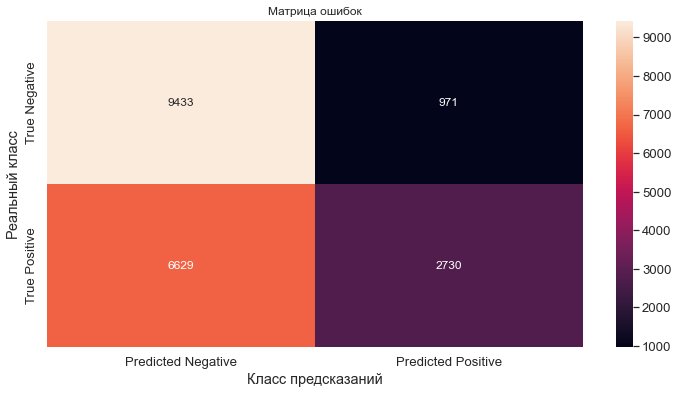

In [63]:
preds_test = grid_lgb.predict(features_test_LGB)

conf_matrix = confusion_matrix(target_test_LGB, preds_test)

df_conf_matrix = pd.DataFrame(conf_matrix, index=['True Negative', 'True Positive'],
                 columns=['Predicted Negative', 'Predicted Positive'])

sns.set(font_scale=1.2)
plt.figure(figsize=(12,6))
    
sns.heatmap(conf_matrix, annot=True, fmt='g' ,xticklabels=df_conf_matrix.columns, yticklabels=df_conf_matrix.index, annot_kws={"size": 12})
plt.title("Матрица ошибок", size=12)
plt.xlabel('Класс предсказаний')
plt.ylabel('Реальный класс');

In [64]:
TP = conf_matrix[0][0]
TN = conf_matrix[1][1]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
total = conf_matrix[0][0]+conf_matrix[1][1]+conf_matrix[0][1]+conf_matrix[1][0]

print('Всего предсказаний:',total)
print(f'Правильно классифицированные: {np.round((TP+TN)/total*100)}%')
print(f'Правильно классифицированная вина: {np.round(TP/(TP+FN)*100)}%')
print(f'Правильно классифицированое отсутствие вины: {np.round(TN/(TN+FP)*100)}%')
print(f'Прогнозируемая вина, соответствующая действительности: {np.round(TP/(TP+FP)*100)}%')
print(f'Прогнозируемое отсутствие вины, которой так же на самом деле нет: {np.round(TN/(TN+FN)*100)}%')

Всего предсказаний: 19763
Правильно классифицированные: 62.0%
Правильно классифицированная вина: 59.0%
Правильно классифицированое отсутствие вины: 74.0%
Прогнозируемая вина, соответствующая действительности: 91.0%
Прогнозируемое отсутствие вины, которой так же на самом деле нет: 29.0%


### Анализ важности основных факторов, влияющих на вероятность ДТП

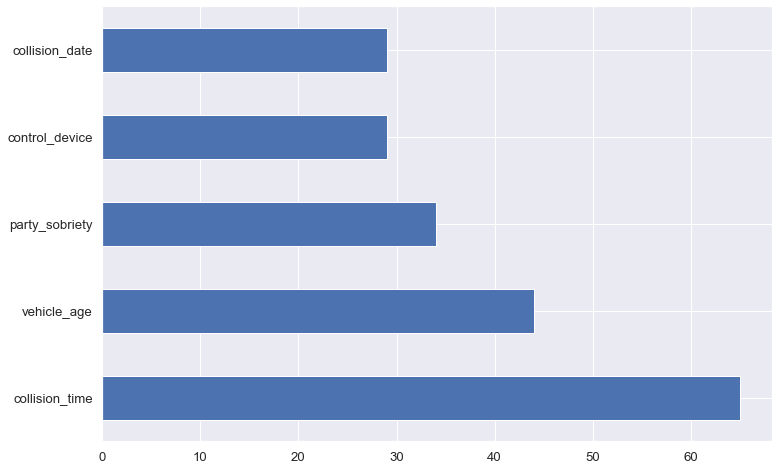

In [65]:
plt.figure(figsize=(12, 8))
feat_importances_dt = pd.Series((grid_lgb.best_estimator_.feature_importances_), index=features_train_LGB.columns)
feat_importances_dt.nlargest(5).plot(kind='barh')
plt.show()

<b>Вывод</b>

Наиболее важный фактор для модели - время суток. Следующие по важности факторы идут: возраст автомобиля, трезвость участников, состояние дорожного покрытия и месяц.

In [66]:
query = '''
SELECT
    EXTRACT(HOUR FROM collision_time ) AS hours,
    count(case_id) AS count_of_collisions
FROM collisions
GROUP BY hours
HAVING EXTRACT(HOUR FROM collision_time ) IS NOT NULL
ORDER BY count_of_collisions
'''

table_1 = pd.read_sql_query(query, con=engine) 
display(table_1)

,hours,count_of_collisions
0,4.0,15255
1,3.0,18406
2,5.0,20194
3,0.0,26438
4,1.0,26611
5,2.0,28237
6,23.0,32549
7,6.0,33756
8,22.0,39195
9,21.0,45869


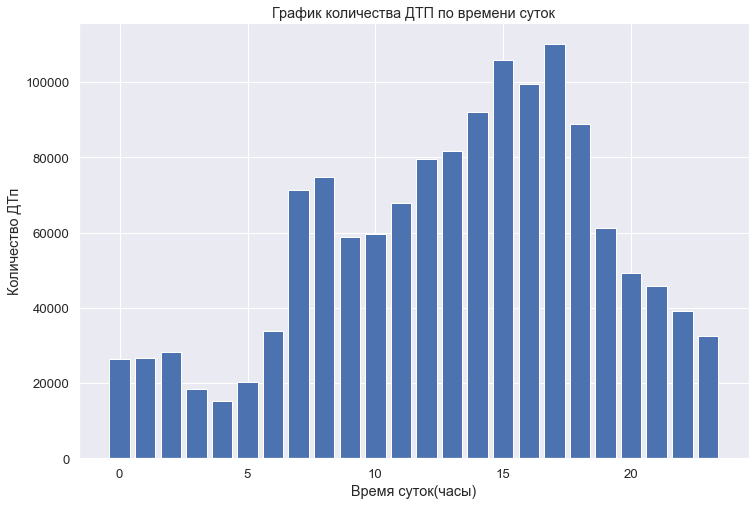

In [67]:
plt.figure(figsize=(12, 8))
plt.bar(table_1['hours'], table_1['count_of_collisions'])
plt.gca().set(title='График количества ДТП по времени суток', ylabel='Количество ДТп', xlabel='Время суток(часы)')
plt.show()

#### Вывод

Судя по графику, количество ДТП действительно зависит от времени суток. Более того, наибольшее количество ДТП наблюдается в промежутке с 15 до 18 часов, когда люди едут домой с работы, также небольшой скачок наблюдается в 7-8 часов утра, когда едут на работу. Вполне логично предположить, что связь между временем суток и вероятностью ДТП появляется из-за нагруженности потока машин в определенное время - с большой вероятностью можно предположить, что если бы в данных была информация о нагруженности потока, то она также коррелировала, как и время суток, а может и точнее.


При таком раскладе логичнее всего было бы предложить оборудовать автомобиль другой нейронной сетью, которая, кроме состояние дороги и других рассматриваемых в этом исследовании факторов, анализирует нагруженность дорог и наличие пробок, и строит более "безопасный" маршрут, где находится меньше машин, пускай на него и будет выходить на 10-15% больше времени (ставить больший приоритет на безопасность, а не на кратчайшее расстояние). Более того, если распространить такую систему на большое количество автомобилей, то нейронная сеть в режиме реального будет более менее равномерно распределять весь поток машин, что хоть и выходит за рамки данного проекта, но выглядит не менее полезно, как для бизнеса (большое распространение своей системы даст немалую прибыль для компании, создавшую её), так и для людей (меньше пробок и выше безопасность).

## Выводы

### Краткое описание лучшей модели

Получена модель со следующими параметрами и результатами:

In [68]:
print('                                           LGBMClassifier')
print('*********************************************************************************************************')
print('                                        Подобранные параметры:')
print(grid_lgb.best_params_)
print('*********************************************************************************************************')
print('                                       Полученные метрики модели')
display(compare_models.loc[2, :])
TP = conf_matrix[0][0]
TN = conf_matrix[1][1]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
total = conf_matrix[0][0]+conf_matrix[1][1]+conf_matrix[0][1]+conf_matrix[1][0]
print('*********************************************************************************************************')
print('                                    Подробное описание результатов')
print('Всего предсказаний:',total)
print(f'Правильно классифицированные: {np.round((TP+TN)/total*100)}%')
print(f'Правильно классифицированная вина: {np.round(TP/(TP+FN)*100)}%')
print(f'Правильно классифицированое отсутствие вины: {np.round(TN/(TN+FP)*100)}%')
print('*********************************************************************************************************')

                                           LGBMClassifier
*********************************************************************************************************
                                        Подобранные параметры:
{'boosting_type': 'gbdt', 'class_weight': 'balanced', 'max_depth': 60, 'n_estimators': 10}
*********************************************************************************************************
                                       Полученные метрики модели


model       LGBMClassifier
F1_train          0.421212
F1_test            0.41807
AUC-ROC           0.599184
Name: 2, dtype: object

*********************************************************************************************************
                                    Подробное описание результатов
Всего предсказаний: 19763
Правильно классифицированные: 62.0%
Правильно классифицированная вина: 59.0%
Правильно классифицированое отсутствие вины: 74.0%
*********************************************************************************************************


### Итоговый вывод


1. Выбранная модель предсказывает наличие вины чуть больше чем в половине случаев, что уже не так плохо, однако и не слишком хорошо. Возможно результаты были бы лучше, если применить другой тип моделей и перебрать больше параметров, но маловероятно, что в итоге будет получен заметно лучший результат. 


2. Создание адекватной системы оценки риска при выдаче авто возможен, т.к. уже сейчас получилось предсказать интересующие значения больше чем в половине случаев, значит это возможно. Однако для создания такой системы нужны дополнительные данные, тогда и результаты метрик качества(точности) будут выше.


3. Факторы, которые ещё необходимо собирать: 
- информация о загруженности дорог в реальном времени; 
- определить опасные участки на конкретных маршрутах и, которые будут определяться лишь количеством аварий на конкретном участке, и если выбранный пользователем маршрут проложен через большое количество, то обозначать это определенным значением в данных.
- стаж водителя